# Tratamento de Dados de Telescópio
**Equipe:** Daniel, Jones, Kleberson, Murilo

## Apresentação
### O Telescópio Kepler e a Descoberta de Exoplanetas

#### Introdução
- O Telescópio Espacial Kepler, lançado pela NASA em 2009, foi projetado para descobrir exoplanetas, <br>
  ou seja, planetas que orbitam estrelas fora do nosso sistema solar.
- A missão Kepler teve como objetivo principal explorar a estrutura e a diversidade dos sistemas <br>
planetários, contribuindo significativamente para a nossa compreensão do universo.

#### Objetivos da Missão Kepler
- **Exploração da Diversidade Planetária**: Investigar a variedade de planetas e suas características.
- **Identificação de Exoplanetas**: Detectar planetas em zonas habitáveis, onde a vida poderia existir.
- **Coleta de Dados**: Fornecer dados extensivos que apoiem futuras missões da NASA e pesquisas científicas.

#### O Conjunto de Dados
- O conjunto de dados contém informações sobre aproximadamente **3.373 exoplanetas confirmados**.
- Inclui dados coletados durante as missões Kepler e K2, abrangendo vários anos de observação.
- **Informações Disponíveis**:
  - Nome da estrela hospedeira
  - Características dos planetas (tamanho, massa, composição)
  - Parâmetros orbitais (período orbital, distância da estrela)
  - Métodos de descoberta (transito, velocidade radial)
  - Propriedades estelares (tipo de estrela, temperatura)

#### Importância dos Dados
- Os dados do Kepler são cruciais para entender a formação e evolução dos sistemas planetários.
- Permitem a análise estatística da distribuição de exoplanetas em diferentes tipos de estrelas e suas <br>características.
- A pesquisa com esses dados pode revelar padrões que ajudam a identificar quais sistemas planetários <br> têm maior probabilidade de abrigar vida.



## Tratamento de Dados
**Bibliotecas Necessárias**

In [114]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import seaborn as sns

**Filtragem dos Dados**

In [115]:
# 1) Lê o CSV para um DataFrame
df_original = pd.read_csv('../data/planets.csv')

# 2) Máscara para filtrar os dados mantendo só as linhas onde 'col_importante' NÃO é NaN
mask = (
    (df_original['pl_hostname'] != '') &
    (df_original['pl_pnum'] != '') &
    (df_original['pl_orbper'].notna()) &
    # (df_original['pl_orbsmax'].notna()) &
    (df_original['pl_orbeccen'].notna()) &
    (df_original['pl_orbincl'].notna()) &
    (df_original['pl_bmassj'] != '') &
    (df_original['pl_radj'].notna()) &
    (df_original['pl_dens'].notna()) &
    # (df_original['st_dist'].notna()) &
    (df_original['st_teff'].notna()) &
    (df_original['st_mass'].notna()) &
    (df_original['st_rad'].notna())
)

df = df_original[mask]

# 3) A partir daqui use df para suas análises
print(f"Quantidade de dados que serão utilizados nos testes: {len(df)}")

Quantidade de dados que serão utilizados nos testes: 281


## Utilizando os Dados

### Semieixo Maior
O semieixo maior é um termo fundamental em geometria e astronomia. Em uma elipse, ele representa a metade <br> do eixo maior, a distância do centro da elipse ao ponto mais distante da curva. Em astronomia, o semieixo maior <br> descreve a distância média de um objeto que orbita outro, como um planeta em torno do Sol.

- O semieixo maior "a" caracteriza o tamanho médio da órbita e está diretamente relacionado ao período orbital (T) <br> pela Terceira Lei de Kepler:
$T^2 \propto a^3$, onde T é o tempo que o corpo leva para dar uma volta completa.

- Por que é útil?
    - Permite calcular energia orbital média e velocidade média.
    - Ajuda a determinar o período de revolução.
    - Serve como parâmetro fundamental em simulações e missões espaciais.
    - Nos ajudará a determinar valores de acordo com os dados obtidos.

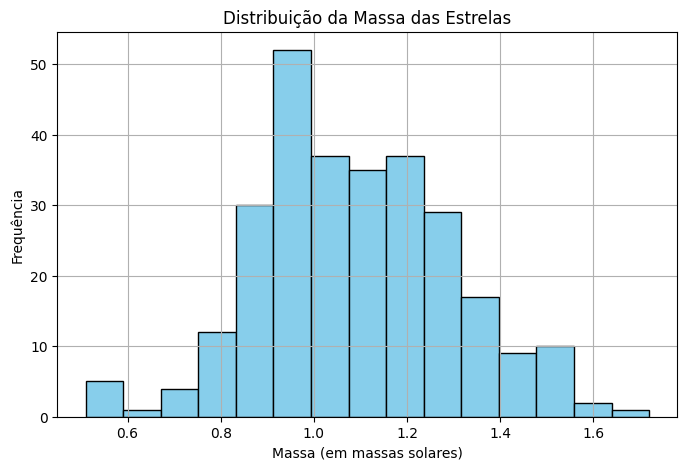

Média da massa das estrelas em Massas Solares 1.0890747330960855


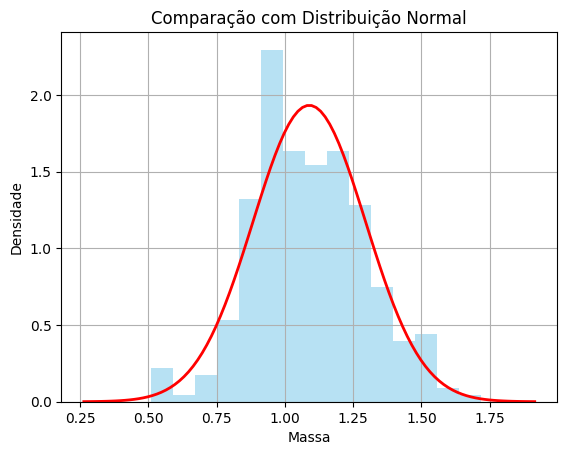

Estatística = 0.9884, p-valor = 0.0240
Distribuição não é normal (rejeita H0)


In [116]:
# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['st_mass'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição da Massa das Estrelas')
plt.xlabel('Massa (em massas solares)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Média da massa das estrelas em Massas Solares
Mmestre = df["st_mass"].mean()
print(f"Média da massa das estrelas em Massas Solares {Mmestre}")

# plt.figure(figsize=(8, 5))
# sns.kdeplot(df['st_mass'].dropna(), fill=True, color='skyblue')
# plt.title('Distribuição KDE da Massa das Estrelas')
# plt.xlabel('Massa (em massas solares)')
# plt.grid(True)
# plt.show()

# sns.kdeplot(df['st_mass'].dropna(), fill=True, color='skyblue')

media = df['st_mass'].mean()
desvio = df['st_mass'].std()
x = np.linspace(media - 4*desvio, media + 4*desvio, 100)
y = norm.pdf(x, media, desvio)

plt.hist(df['st_mass'].dropna(), bins=15, density=True, alpha=0.6, color='skyblue')
plt.plot(x, y, 'r-', lw=2)  # Curva normal
plt.title('Comparação com Distribuição Normal')
plt.xlabel('Massa')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

stat, p = shapiro(df['st_mass'].dropna())
print(f'Estatística = {stat:.4f}, p-valor = {p:.4f}')
if p > 0.05:
    print("Distribuição aparentemente normal (falha em rejeitar H0)")
else:
    print("Distribuição não é normal (rejeita H0)")



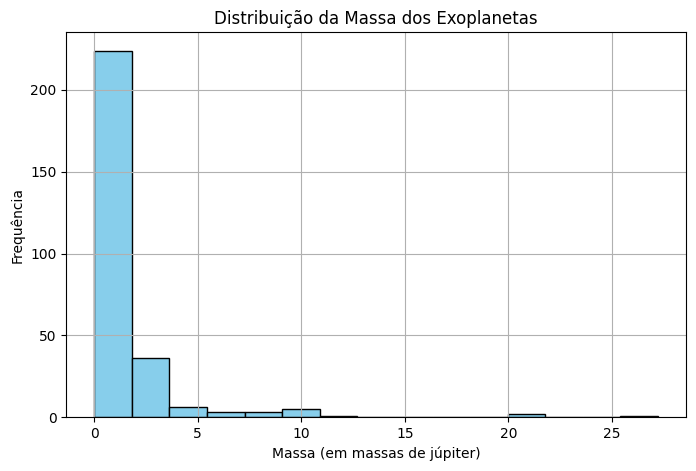

Média da massa dos planetas em Massas de Júpiter 1.5322121708185055


In [117]:
# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['pl_bmassj'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição da Massa dos Exoplanetas')
plt.xlabel('Massa (em massas de júpiter)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Média da massa das estrelas em Massas de Júpiter
Mplaneta = df['pl_bmassj'].mean()
print(f"Média da massa dos planetas em Massas de Júpiter {Mplaneta}")

# sns.kdeplot(df['pl_bmassj'].dropna(), fill=True, color='skyblue')

# stat, p = shapiro(df['st_mass'].dropna())
# print(f'Estatística = {stat:.4f}, p-valor = {p:.4f}')
# if p > 0.05:
#     print("Distribuição aparentemente normal (falha em rejeitar H0)")
# else:
#     print("Distribuição não é normal (rejeita H0)")

A fórmula do semieixo maior da órbita é dada por:
$$
a^3 = \frac{G \cdot (M_{mestre} + M_{planeta} \cdot P^2)}{4\pi^2}
$$
Onde
- $G$ = Constante gravitacional = $6.67384 \times 10^{-11} \textrm{m}^{3}\textrm{kg}^{-1}\textrm{s}^{-2}$ <br>
- $M_{mestre}$ = Massa do planeta maior <br>
- $M_{planeta}$ = Massa do planeta menor <br>
- $P$ = Período orbital em segundos

In [118]:
# Semieixo maior da [orbita]
G = 6.67384e-11
P = df['pl_orbper'].mean() * 86400
Mmestre_kg = Mmestre * 1.989e+30
Mplaneta_kg = Mplaneta * 1.898e+27
a_cubo = G * (Mmestre_kg + Mplaneta_kg) * P**2 / (4 * math.pi**2)
a = math.cbrt(a_cubo)
AU_m = 1.496e+11

# Valor do Semieixo maior com base nas médias
print(f'Semieixo Maior: {a:.3e} m\nSemieixo Maior: {a/AU_m:.3f} UA')

Semieixo Maior: 1.700e+10 m
Semieixo Maior: 0.114 UA


Note que, em média, os exoplanetas encontrados orbitam sua estrela a cerca de 0,11 unidades astronômicas, uma órbita <br> bem mais próxima que a da Terra (1 UA), o que é comum para exoplanetas do tipo "hot Jupiter" (Júpiteres quentes) ou exoplanetas <br> com períodos curtos.

### Velocidade Orbital
Velocidade orbital é a velocidade mínima que um objeto (satélite, nave espacial, asteroide etc.) precisa ter para entrar <br> em órbita estável (circulatória) ao redor de um corpo celeste (planeta, lua, estrela), sem cair de volta nem fugir para o espaço.

- Para a Terra, essa velocidade na superfície (desprezando atmosfera) é cerca de 7,9 km/s.
- Se o objeto for lançado mais alto, em altitude h, a velocidade orbital diminui um pouco: quanto maior a distância do centro <br> da Terra, menor a velocidade necessária.

- Órbitas elípticas
    - Para órbitas elípticas, a velocidade varia ao longo da trajetória: é maior no perigeu (ponto mais próximo) e menor no <br> apogeu (ponto mais distante), obedecendo à conservação de energia (energia cinética + potencial).

- Importância prática
    - Definir satélites de comunicação, estações espaciais e sondas interplanetárias.
    - Determinar janelas de lançamento e manobras de correção de órbita.

A fórmula que nos dá velocidade média ao longo de uma volta completa é:
$$
V_{media} = \frac{2 \cdot \pi \cdot a}{P}
$$
Onde
- $a$ é o semieixo maior da elipse (para órbita circular, a = r)
- $P$ é o período orbital.

Velocidade orbital: 92288.544 m/s
Velocidade Orbital: 92.289 km/s
Velocidade orbital: 332238.759 km/h


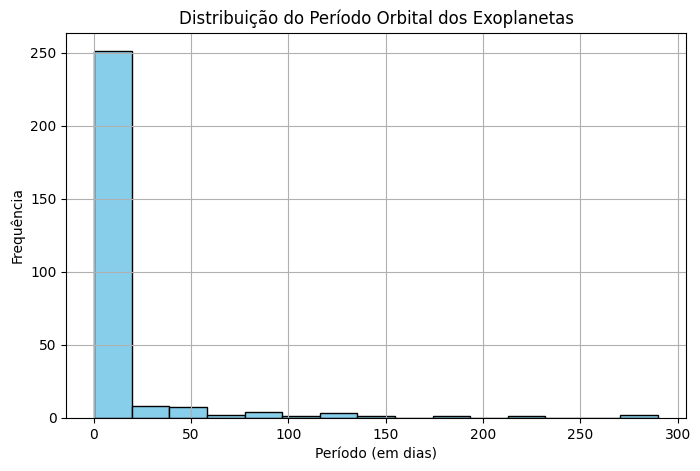

In [119]:
# v = √(GM/r)
# • É a velocidade instantânea necessária para uma órbita perfeitamente circular de raio r.
# • Depende só da posição (r) e da massa central (M).
V_med = 2 * math.pi * a / P
print(f'Velocidade orbital: {V_med:.3f} m/s\nVelocidade Orbital: {V_med/1000:.3f} km/s\nVelocidade orbital: {V_med * 3.6:.3f} km/h')

# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['pl_orbper'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Período Orbital dos Exoplanetas')
plt.xlabel('Período (em dias)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Note que a velocidade média da orbita desses exoplanetas é de ~93 km/s, uma velocidade típica para exoplanetas muito próximos <br> de suas estrelas (comparável, por exemplo, com Mercúrio, que viaja a ~47 km/s).

### Região de Domínio Gravitacional do Planeta (Raio de Hill)

O raio de Hill (ou esfera de Hill) de um corpo "pequeno" (por exemplo, um planeta) é a região ao redor desse corpo dentro da qual <br> sua atração gravitacional domina sobre a de um corpo "grande" em torno do qual ele orbita (por exemplo, uma estrela). Num sentido <br> prático, dentro do raio de Hill um satélite natural (como a lua) pode manter-se ligado ao planeta sem ser "arrancado" pela gravidade da estrela.

- Interpretação
    - Se você colocar um satélite em órbita do planeta a uma distância menor que o raio de Hill, ele tende a permanecer ligado ao planeta.
    - Além do raio de Hill, a força gravitacional da estrela vence a do planeta e o satélite pode escapar para a estrela.

- Exemplos de aplicação
    - Estimar o limite máximo para a existência de luas estáveis.
    - Em dinâmica de sistemas de vários planetas, determinar regiões de influência mútua.
    - Em estudos de captura de objetos (asteroides, cometas) por planetas.

In [120]:
# Raio de Hill
r_H = a * math.cbrt(Mplaneta_kg / (3*Mmestre_kg))
print(f'Raio de Hill: {r_H:.3e} m\nRaio de Hill: {r_H/1000:.3e} km\nRaio de Hill: {r_H/AU_m:.5f} UA')

Raio de Hill: 1.300e+09 m
Raio de Hill: 1.300e+06 km
Raio de Hill: 0.00869 UA


Isso nos mostra que, em média, esses exoplanetas possuem uma região de domínio gravitacional de cerca de $1.300 \cdot 10^6$ km. Comparando com <br> o da Terra (cerca de 0.01 UA), temos que:
$$
\frac{0.00869}{0.01} = 0.0869 \approxeq 0.087 = 87\%
$$
Ou seja, é 0.87 vezes mais estreito que o da Terra (87% do tamanho), cerca de 13\% mais estreito.

### Probabilidade de Trânsito

A probabilidade de trânsito refere-se à chance de um planeta, em órbita ao redor de sua estrela, passar exatamente na linha de visão entre a estrela e <br> um observador (por exemplo, a Terra). Quando isso ocorre, vemos um "trânsito": um pequeno escurecimento periódico no brilho da estrela, causado <br> pela passagem do disco do planeta na frente do disco estelar.

- Por que nem todo planeta “transita”?
    - Orientação aleatória de planos orbitais → a maioria das órbitas não está perfeitamente alinhada com nossa linha de visão.
    - Só se a inclinação orbital for próxima de 90° (a órbita “de lado”), o planeta vai cruzar o disco estelar visto da Terra.

- Fórmula aproximada
A probabilidade geométrica de trânsito, supondo órbita circular, é dada por
Pₜ ≃ (R★ + Rₚ) / a
onde
- R★ = raio da estrela
- Rₚ = raio do planeta (normalmente negligenciado quando Rₚ ≪ R★, passa a ser Pₜ ≃ R★/a)
- a = semieixo maior da órbita

- Interpretação do resultado
    - Se R★/a = 0,1 → Pₜ ≃ 10 % → há 1 chance em 10 de o planeta transitar.
    - Quanto mais próxima a órbita (menor a), maior a probabilidade. Planetas “quentes” (a pequeno) transitam com muito mais frequência que planetas em órbitas longas.

- Exemplo numérico
    - Terra: R☉ ≃ 0,00465 UA, a⊕ = 1 UA → Pₜ ≃ 0,00465 → 0,465% (cerca de 1 em 215 chances de a Terra, vista de um lugar aleatório, transitar o Sol)
    - Kepler-10 b (planeta bem próximo): R★/a ≃ 0,03 → Pₜ ≃ 3 %

- Aplicação prática
    - Em levantamentos de trânsito (como missões Kepler, TESS), a probabilidade de trânsito determina quantos planetas de uma dada população devemos esperar detectar.
    - Para estimar a taxa real de ocorrência de exoplanetas, corrige-se o número observado dividindo-se pela probabilidade geométrica de trânsito.

Média do Raio das Estrelas (em Raio Solar): 1.239
Média do Raio dos Planetas (em Raio de Júpiter): 1.065


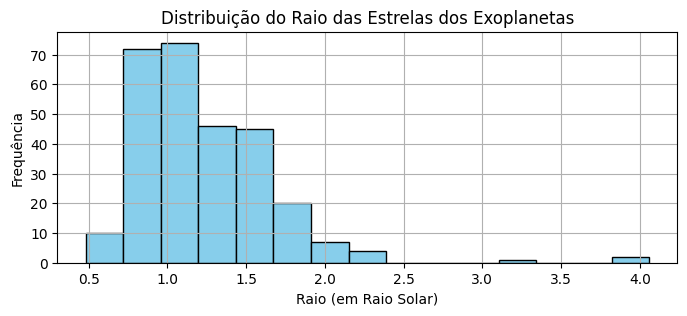

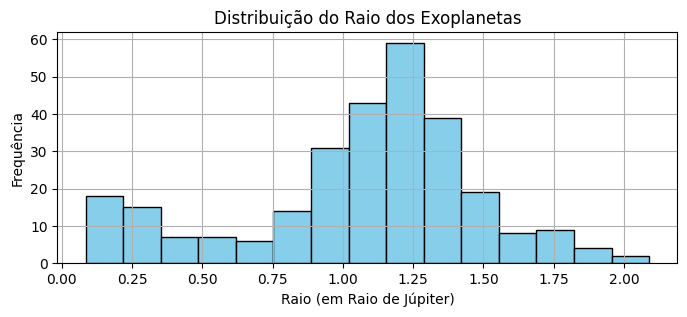

In [122]:
# Média do Raio das Estrelas
R_estrela = df['st_rad'].mean()

# Média do Raio dos Planetas
R_planeta = df['pl_radj'].mean()

print(f'Média do Raio das Estrelas (em Raio Solar): {R_estrela:.3f}')
print(f'Média do Raio dos Planetas (em Raio de Júpiter): {R_planeta:.3f}')

# Histograma (Raio das Estrelas)
plt.figure(figsize=(8, 3))
plt.hist(df['st_rad'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Raio das Estrelas dos Exoplanetas')
plt.xlabel('Raio (em Raio Solar)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma (Raio dos Planetas)
plt.figure(figsize=(8, 3))
plt.hist(df['pl_radj'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Raio dos Exoplanetas')
plt.xlabel('Raio (em Raio de Júpiter)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()